**AI05123 - VIRGIE YUNITA SALSABIL**

Deep Learning for MNIST Handwritten Digit Classification using PyTorch.
This is an exploration task. Develop your end-to-end workflow for solving
a Handwritten Digit Classification task using Neural Network architecture
(not Convolutional Neural Network). These are the criteria for scoring:

- Loading your MNIST dataset for the data loader
- Visualize several MNIST datasets
- Design your Neural Network model
- Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc
- Develop a training loop and run a training model
- Evaluate the Model using several performance metrics such as accuracy, confusion matrix, F1 Score, Precision, Recall, etc
- Describe and explain your Result

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

In [27]:
# Step 1: Loading dataset MNIST ke dalam data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [28]:
# Jumlah data latih
num_train_samples = len(train_dataset)

# Jumlah data uji
num_test_samples = len(test_dataset)

print(f"Jumlah data latih: {num_train_samples} sampel")
print(f"Jumlah data uji: {num_test_samples} sampel")

Jumlah data latih: 60000 sampel
Jumlah data uji: 10000 sampel


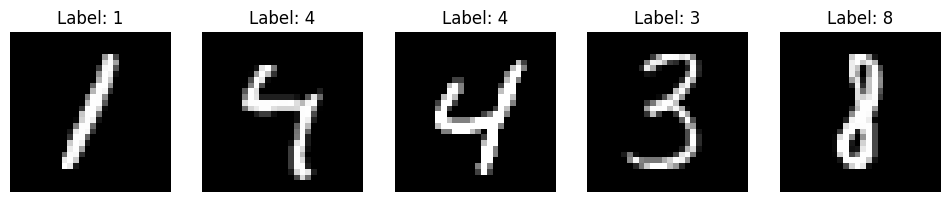

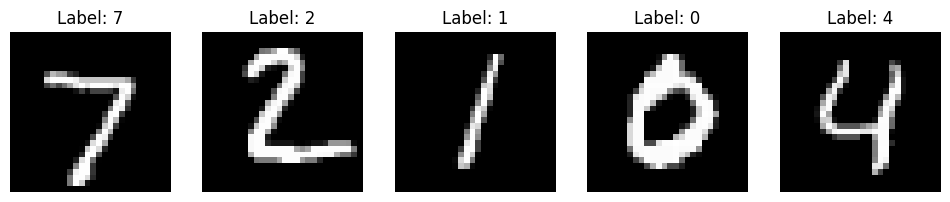

In [29]:
# Step 2: Memvisualisasikan beberapa contoh dari dataset MNIST
def visualize_samples(data_loader, num_samples=5):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis('off')
    plt.show()

# Memvisualisasikan beberapa contoh dari data latih
visualize_samples(train_loader, num_samples=5)

# Memvisualisasikan beberapa contoh dari data uji
visualize_samples(test_loader, num_samples=5)

In [30]:
# Step 3: Mendefinisikan model Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Layer input ke hidden layer
        self.relu = nn.ReLU()             # Fungsi aktivasi ReLU
        self.fc2 = nn.Linear(128, 10)     # Hidden layer ke output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Meratakan gambar menjadi vektor
        x = self.fc1(x)        # Layer input ke hidden layer
        x = self.relu(x)       # Fungsi aktivasi ReLU
        x = self.fc2(x)        # Hidden layer ke output layer
        return x

# Membuat instance model
model = SimpleNN()

# Menampilkan arsitektur model
print(model)

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [31]:
# Step 4: Setup hyperparameters
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 15 #model akan melatih dirinya sendiri sebanyak 15 kali pada seluruh dataset.

**PENJELASAN :**

- Nilai epoch dalam pelatihan model Neural Network digunakan untuk mengontrol seberapa banyak seluruh dataset latih akan dilewati oleh model dalam pelatihan.
- Satu epoch mengacu pada satu kali proses pengolahan keseluruhan dataset latih oleh model.

In [32]:
# Step 5: Buatlah loop pelatihan dan jalankan model pelatihan
def train(model, train_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()  # Mengatur model ke mode pelatihan
        running_loss = 0.0  # Inisialisasi loss selama satu epoch

        # Loop melalui batch-batch data latih
        for inputs, labels in train_loader:
            optimizer.zero_grad()  # Mengatur gradien menjadi nol
            outputs = model(inputs)  # Menggunakan model untuk membuat prediksi
            loss = criterion(outputs, labels)  # Menghitung loss
            loss.backward()  # Menghitung gradien berdasarkan loss
            optimizer.step()  # Melakukan pembaruan parameter berdasarkan gradien
            running_loss += loss.item()  # Menambahkan loss ke running_loss

        # Cetak loss rata-rata untuk epoch ini
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}')

# Memanggil fungsi train untuk melatih model
train(model, train_loader, criterion, optimizer, num_epochs)

Epoch 1/15, Loss: 0.37852616882178064
Epoch 2/15, Loss: 0.19372840337494987
Epoch 3/15, Loss: 0.1384256351957602
Epoch 4/15, Loss: 0.10989027272369753
Epoch 5/15, Loss: 0.0948912432158628
Epoch 6/15, Loss: 0.08158023220780831
Epoch 7/15, Loss: 0.07449541164975144
Epoch 8/15, Loss: 0.06432637755822605
Epoch 9/15, Loss: 0.060473930621609044
Epoch 10/15, Loss: 0.05682089690169665
Epoch 11/15, Loss: 0.0521415295208425
Epoch 12/15, Loss: 0.04543040592723818
Epoch 13/15, Loss: 0.04351355022841892
Epoch 14/15, Loss: 0.04166976772204065
Epoch 15/15, Loss: 0.03697428688370208


In [35]:
# Step 6 : Evaluate the Model using several performance metrics such as accuracy, confusion matrix, F1 Score, Precision, Recall, etc

# Menginisialisasi list untuk menyimpan prediksi dan label sebenarnya
all_predictions = []
all_labels = []

# Mengubah model ke mode evaluasi
model.eval()  # Mengubah model ke mode evaluasi (non-pelatihan)

# Loop melalui data uji
with torch.no_grad():  # Tidak memerlukan perhitungan gradien saat evaluasi
    for images, labels in test_loader:
        outputs = model(images)  # Menghasilkan prediksi dari model
        _, predicted = torch.max(outputs, 1)  # Mengambil indeks kelas dengan probabilitas tertinggi

        # Menambahkan prediksi dan label sebenarnya ke list
        all_predictions.extend(predicted.cpu().numpy())  # Mengonversi tensor ke NumPy array
        all_labels.extend(labels.cpu().numpy())  # Mengonversi tensor ke NumPy array

# Menghitung akurasi
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Membuat matriks konfusi
confusion = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(confusion)

# Menampilkan laporan klasifikasi (precision, recall, F1-score, dll)
class_rep = classification_report(all_labels, all_predictions)
print('\n Classification Report:')
print(class_rep)

Accuracy: 0.9742
Confusion Matrix:
[[ 966    1    1    0    2    1    6    2    1    0]
 [   0 1127    2    2    0    1    1    1    1    0]
 [   4    1 1004    4    8    0    0    5    6    0]
 [   0    0    2  991    0    6    0    4    3    4]
 [   2    0    2    0  969    0    2    2    3    2]
 [   3    1    0    9    3  860    5    3    5    3]
 [   3    4    1    1    9    4  933    0    3    0]
 [   1    5    4    4    0    0    0 1009    4    1]
 [   4    0    1    3    4    4    3    6  945    4]
 [   1    4    0    6   23    8    1   19    9  938]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.95      0.99      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0

## **7. Describe and explain your Result**

Dari pemodelan Deep Learning yang telah dilakukan untuk klasifikasi digit tulisan tangan menggunakan PyTorch pada dataset MNIST, beberapa kesimpulan yang di dapat yaitu :
- Model yang sudah dilatih memiliki **akurasi yang sangat tinggi**, sekitar **97.42%** yang merupakan persentase prediksi yang benar dari total 10.000 sampel dalam dataset uji.
- **Artinya** -> Model mampu mengenali digit-digit tulisan tangan dengan akurasi yang sangat baik.

- Dalam pelatihan model di atas sudah menggunakan hyperparameter yang tepat, seperti fungsi loss yang sesuai, optimizer yang baik, dan jumlah epoch yang cukup.

- **Confusion Matrix** menggambarkan tentang seberapa baik model mengklasifikasikan setiap kelas.
- Diagonal utama = prediksi yang benar
- Di luar diagonal utama = kesalahan prediksi.
- **Hasil dari Confusion Matrix** di atas umumnya memiliki kinerja yang baik, dengan nilai pada diagonal utama yang lebih tinggi daripada nilai diluar diagonal utama.
